# Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.9.1


# Basic architecture of a NN

* Input layer: same as the number of samples
* Hidden layer: Unlimited, minumum 1
* Output layer: same as the number of desired outputs (number of classes, if regression, 1)

***there are more parameters, they will be covered in more detail latter***

**Regression problem, is simple words, is predicting a number, so lets get going! :)**

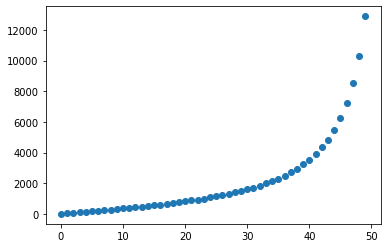

In [2]:
# Lets create some data to fit
X = np.array([number for number in range(0, 50)])

rand = randint(0, 50) # -> Define a fixed random number that will multiply x
Y = np.array([(number * rand) / np.cos(number/rand) for number in X])

# Scater
plt.scatter(X, Y);

**But hold ON! If you try to train the model with this, you will encounter problems, bexause tensorflow 2.7+ requires the data to have at least 2 dimensions, in your case the data has 1 dimension mathematicaly speaking, and 0 ("tensorflowing" speaking)**

***lets fix the data dimensions***

In [3]:
xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.33)

xtr = tf.expand_dims(xtr, axis=-1)
xte = tf.expand_dims(xte, axis=-1)

ytr = tf.expand_dims(ytr, axis=-1)
yte = tf.expand_dims(yte, axis=-1)

**This is odd, but correct, because the input is a scalar, with has 0 dimensions in tensor flow, and the output as 0 dimensions too**

In [ ]:
# Let"s build a model to fit this problem

# Step 1: Create a model: Define the layers (input, hidden, output, and maybe others)

# Set random seed
tf.random.set_seed(32)

# Model
model = tf.keras.Sequential([ # -> Sequential API make the layers in the coded order
    tf.keras.layers.Dense(1) # -> Just one layer (with 1 neuron)
])

# Step 2: Compile the model 
model.compile(
    loss=tf.keras.losses.mae, # Mean Absolute Error
    optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
    metrics=["mae"] # See how the model is going with this metric
)

## Define the loss function: The funciton that says how much the model is wrong;
## Define the optimizer: The funcitons that says how your model can improve;
## Dine eval metrics: The functions that can interpret the performance of your model;

# Step 3: Fitting the model: Letting the model find the relations
model.fit(X, Y, epochs=50) # -> How have 50 epochs to learn the patterns

Summary returns:
- The output shape
- The layers and its types
- Trainable parameters: Number of parameters that the model can change while training
- Total parameters: Total number of parameters
- Non-trainable parameters: Freezed parameters, the model will not change these (normal when ussing pre saved models)

What are this parameters?
- Bias
- Weights

Learn more her: https://www.youtube.com/watch?v=7sB052Pz0sQ&ab_channel=AlexanderAmini

# Evaluating regression


## Metrics:

* MAE
* MSE

## Lets try to improve your model
###### Data Scientists rule of thumb: experiment, experiment, experiment

* Get more data
* Make model larger
* Train for longer periods

**Lets try some things:**
- Model 1: train for longer
- Model 2: more epochs at train, and more layer
- Model 3: train for 500 epochs

## Model 1

In [4]:
# Make evaluaction functions
def mse(yhat, ytrue):
    mse_e = tf.keras.losses.MeanSquaredError()
    return mse_e(ytrue, yhat)

def mae(yhat, ytrue):
    mae = tf.keras.losses.MeanAbsoluteError()
    return mae(ytrue, yhat)

def see(yhat, ytrue):
    print(f"Mse: {mse(yhat, ytrue)} | Mae: {mae(yhat, ytrue)}")

In [92]:
# Model 1
tf.random.set_seed(32)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_1.fit(xtr, ytr, epochs=100, batch_size=1)

Epoch 1/100
33/33 [==============================] - 0s 666us/step - loss: 1614.2908 - mae: 1614.2908
Epoch 2/100
33/33 [==============================] - 0s 1ms/step - loss: 1401.6666 - mae: 1401.6666
Epoch 3/100
33/33 [==============================] - 0s 1ms/step - loss: 1189.0432 - mae: 1189.0432
Epoch 4/100
33/33 [==============================] - 0s 1ms/step - loss: 976.4196 - mae: 976.4196
Epoch 5/100
33/33 [==============================] - 0s 1ms/step - loss: 763.7961 - mae: 763.7961
Epoch 6/100
33/33 [==============================] - 0s 1ms/step - loss: 555.8400 - mae: 555.8400
Epoch 7/100
33/33 [==============================] - 0s 966us/step - loss: 419.3363 - mae: 419.3363
Epoch 8/100
33/33 [==============================] - 0s 1ms/step - loss: 367.8208 - mae: 367.8208
Epoch 9/100
33/33 [==============================] - 0s 1ms/step - loss: 352.1910 - mae: 352.1910
Epoch 10/100
33/33 [==============================] - 0s 1ms/step - loss: 342.6193 - mae: 342.6193
Epoch 11/

In [93]:
# See how your model is going
y_preds_1 = model_1.predict(xte)

see(y_preds_1, yte)

1/1 [==============================] - 0s 60ms/step
Mse: 57525.29296875 | Mae: 207.07040405273438


## Model 2

In [18]:
# Model 2
tf.random.set_seed(32)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(batch_size=1, input_shape=(1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])
model_2.fit(xtr, ytr, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 2404.0054 - mae: 2404.0054
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 2352.4387 - mae: 2352.4387
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 2245.5110 - mae: 2245.5110
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 1906.0652 - mae: 1906.0652
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 1536.2212 - mae: 1536.2212
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 1177.8632 - mae: 1177.8632
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 1298.6476 - mae: 1298.6476
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 1423.9720 - mae: 1423.9720
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 1462.6105 - mae: 1462.6105
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 1533.7039 - mae: 1533.7039
Epoch 11/100
2/2 [=

In [16]:
# See how your model is going
y_preds_2 = model_2.predict(xte)

see(y_preds_2, yte)

1/1 [==============================] - 0s 83ms/step
Mse: 9931799.0 | Mae: 1465.8642578125


## Model 3

In [59]:
# Seed
tf.random.set_seed(32)

# Make model
model_3 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(batch_size=1, input_shape=(1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

# Fit the model
model_3.fit(xtr, ytr, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 1741.1675 - mae: 1741.1675
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 1660.3005 - mae: 1660.3005
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 1430.3763 - mae: 1430.3763
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 1210.2892 - mae: 1210.2892
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 289.3095 - mae: 289.3095
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 948.3583 - mae: 948.3583
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 292.1589 - mae: 292.1589
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 284.9584 - mae: 284.9584
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 265.6298 - mae: 265.6298
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 853.2022 - mae: 853.2022
Epoch 11/500
2/2 [=============

In [34]:
# See how your model is going
y_preds_3 = model_3.predict(xte)

see(y_preds_3, yte)

1/1 [==============================] - 0s 273ms/step
Mse: 1407120.375 | Mae: 1081.7960205078125
